In [3]:
import pandas as pd

In [1]:
# 구의 인구와 버스 정류장 수의 상관관계
%cd 'bus_df_file'

/Users/unhi/Desktop/AI+X/두번째과제/데이터전처리/bus_df_file


In [4]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [5]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [6]:
df_seoul_bus_station.head(3)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504


In [7]:
df_seoul_moving.head(3)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83


In [8]:
df_seoul_business.head(3)

,자치구,동,택시운송업(사업체수),택시운송업(종사자수),한식일반음식점업(사업체수),한식일반음식점업(종사자수),용달화물자동차운송업(사업체수),용달화물자동차운송업(종사자수),부동산중개및대리업(사업체수),부동산중개및대리업(종사자수),...,커피전문점(사업체수),커피전문점(종사자수),남녀용겉옷및셔츠도매업(사업체수),남녀용겉옷및셔츠도매업(종사자수),기타주점업(사업체수),기타주점업(종사자수),일반교과학원(사업체수),일반교과학원(종사자수),한식육류요리전문점(사업체수),한식육류요리전문점(종사자수)
0,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
1,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
2,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [9]:
df_seoul_people.head(3)

,기간,자치구,세대,인구(계),남자,여자,한국인(계),한국인 남자,한국인 여자,등록외국인(계),등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
0,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
1,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
2,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


In [10]:
#구코드
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [11]:
df= pd.DataFrame()
# standard - 구코드
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df.head(3)

,도착 시군구 코드,자치구,기간,세대,인구(계),남자,여자,한국인(계),한국인 남자,한국인 여자,...,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,11010,종로구,2022.1/4,73766,153684,74018,79666,144275,69911,74364,...,4107,5302,1.96,28064,349,106,5468935,5205394,131.889620,125.534028
1,11020,중구,2022.1/4,63767,131450,63869,67581,122173,59448,62725,...,4421,4856,1.92,24742,178,103,3776675,3598932,121.020124,115.324511
2,11030,용산구,2022.1/4,111207,236518,114571,121947,222169,106735,115434,...,7836,6513,2.00,39461,323,67,4189977,4086474,137.891694,134.485421


In [12]:
total = df.loc[:,['자치구','인구(계)','정류장수']]
total.head()

,자치구,인구(계),정류장수
0,종로구,153684,349
1,중구,131450,178
2,용산구,236518,323
3,성동구,291609,435
4,광진구,353110,269


In [25]:


import numpy as np

import pandas as pd



import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

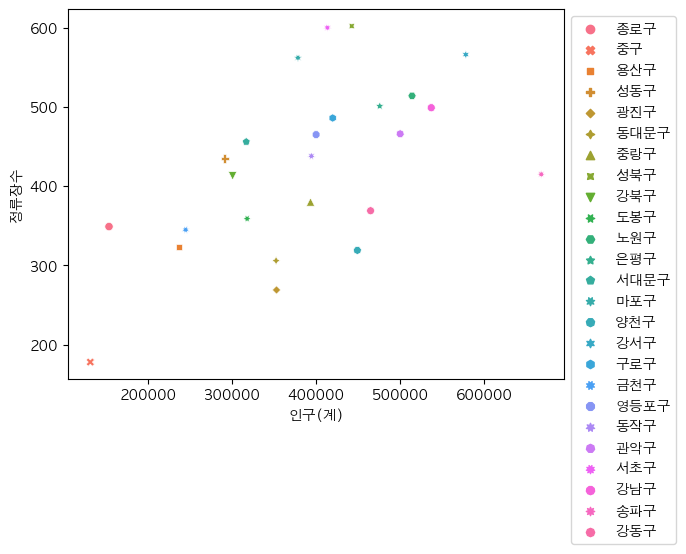

In [38]:
import matplotlib.pylab as plt
from matplotlib import rc  


rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 
ax=sns.scatterplot(x=total['인구(계)'], y=total['정류장수'], hue= total['자치구'], style= total['자치구'])
plt.legend(bbox_to_anchor=(1,1))
# 송파구

In [39]:
#구코드
standard = pd.DataFrame({'출발 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [54]:
#유입인구수는 자치구 내부이동은 고려하지 않는다고 가정.
df=(df_seoul_moving.loc[df_seoul_moving['출발 시군구 코드']!=df_seoul_moving['도착 시군구 코드']])

In [55]:
inn = df.groupby('도착 시군구 코드')[['이동인구(합)']].sum() #유입

In [56]:
innn = pd.DataFrame()
innn = pd.merge(standard, df_seoul_bus_station, how='inner', on='자치구')
innn = pd.merge(innn, inn, how='inner', on='도착 시군구 코드')

In [57]:
innn.head(3)

,출발 시군구 코드,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,이동인구(합)
0,11010,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,12446946.68
1,11020,11020,중구,178,103,3776675,3598932,121.020124,115.324511,13034856.11
2,11030,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,8552703.99


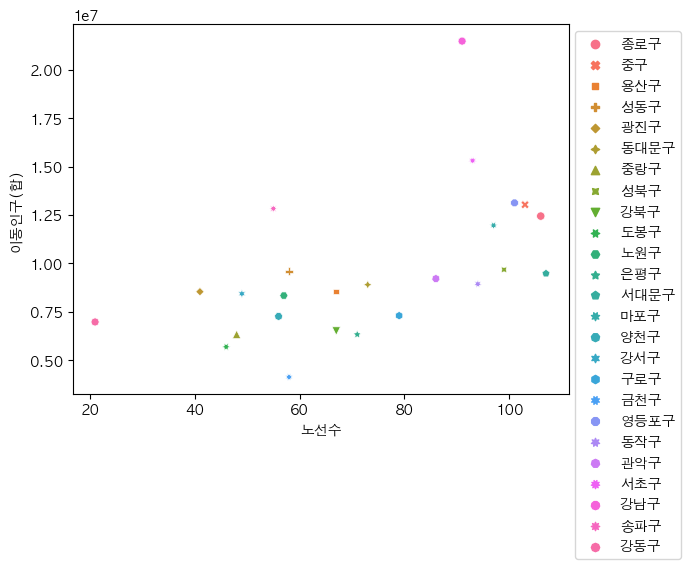

In [58]:
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 
ax=sns.scatterplot(x=innn['노선수'], y=innn['이동인구(합)'], hue= innn['자치구'], style= innn['자치구'])
plt.legend(bbox_to_anchor=(1,1))
# 송파구, 단위다름을 설명

In [59]:
outt = df.groupby('출발 시군구 코드')[['이동인구(합)']].sum() #유출

In [60]:
outtt = pd.DataFrame()
outtt = pd.merge(standard, df_seoul_bus_station, how='inner', on='자치구')
outtt = pd.merge(outtt, outt, how='inner', on='출발 시군구 코드')

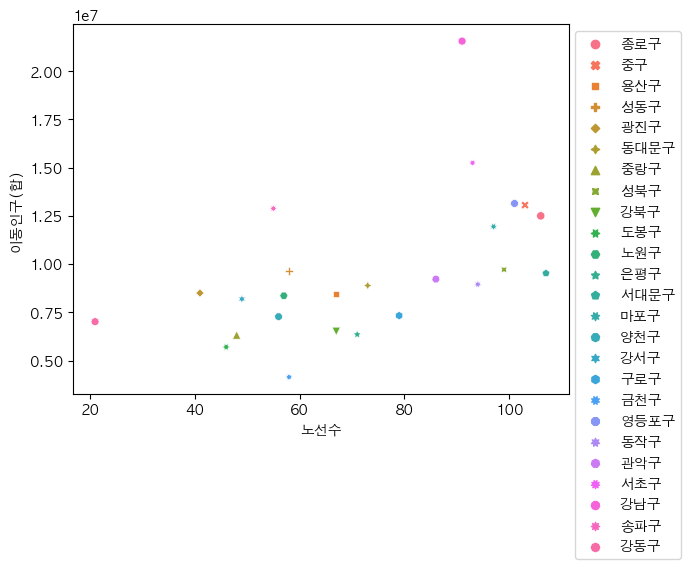

In [61]:
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 
ax=sns.scatterplot(x=outtt['노선수'], y=outtt['이동인구(합)'], hue= outtt['자치구'], style= outtt['자치구'])
plt.legend(bbox_to_anchor=(1,1))
# 송파구, 단위다름을 설명

In [62]:
df_seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [63]:
sm=(df_seoul_moving.loc[df_seoul_moving['출발 시군구 코드']==df_seoul_moving['도착 시군구 코드']])
sm.head(3)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83


In [69]:
smm = df.groupby('출발 시군구 코드')[['이동인구(합)']].sum() 
sm2 = df.groupby('출발 시군구 코드')[['평균 이동 시간(분)']].mean() 
sm3 = pd.merge(smm, sm2, how='inner', on='출발 시군구 코드')
sm4 = pd.merge(sm3, standard, how='inner', on='출발 시군구 코드')
sm4.head(2)

,출발 시군구 코드,이동인구(합),평균 이동 시간(분),도착 시군구 코드,자치구
0,11010,12498993.75,22.900088,11010,종로구
1,11020,13055099.96,22.744441,11020,중구


In [70]:
max(sm4['평균 이동 시간(분)'])

27.05875420875421

In [75]:
sm4.sort_values(by='평균 이동 시간(분)', ascending=False)

,출발 시군구 코드,이동인구(합),평균 이동 시간(분),도착 시군구 코드,자치구
15,11160,8189886.45,27.058754,11160,강서구
24,11250,7015041.23,26.929042,11250,강동구
23,11240,12881553.84,26.739694,11240,송파구
11,11120,6350098.77,26.405399,11120,은평구
9,11100,5702309.68,26.331278,11100,도봉구
10,11110,8361010.73,25.894241,11110,노원구
17,11180,4143420.03,25.827935,11180,금천구
8,11090,6514950.60,25.139119,11090,강북구
6,11070,6323696.23,25.027153,11070,중랑구
16,11170,7329454.51,24.742133,11170,구로구
